In [1]:
import netbone as nb  # I manually disabled (pass) method narrate (class Backbone) because import wasn't working
import os
import pickle
import networkx as nx
from tqdm import tqdm

c:\users\kasia\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Can't load ECM Model in windows, try using it on linux


https://www.nature.com/articles/s41598-023-42076-3

In [40]:
for file_name in tqdm(os.listdir(f'graphs/monthly/')):
    if 'G_6' in file_name:
        G = pickle.load(open(f'graphs/monthly/{file_name}', 'rb'))
        df = nb.disparity(G)
        g = nb.filters.fraction_filter(df, 0.8)
        pickle.dump(g, open(f'graphs_backbone/monthly/{file_name}', 'wb'))

100%|████████████████████████████████████████████████████████████████████████████████| 308/308 [07:32<00:00,  1.47s/it]


In [41]:
for file_name in tqdm(os.listdir(f'graphs/monthly/')):
    G = pickle.load(open(f'graphs/monthly/{file_name}', 'rb'))
    attr = nx.get_node_attributes(G, 'party')

    g = pickle.load(open(f'graphs_backbone/monthly/{file_name}', 'rb'))
    nx.set_node_attributes(g, attr, "party")
    pickle.dump(g, open(f'graphs_backbone/monthly/{file_name}', 'wb'))

100%|████████████████████████████████████████████████████████████████████████████████| 308/308 [01:01<00:00,  4.99it/s]


In [27]:
for file_name in tqdm(os.listdir(f'graphs_backbone/monthly/')):
    G = pickle.load(open(f'graphs_backbone/monthly/{file_name}', 'rb'))
    if len(list(nx.isolates(g))) > 0:
        print(file_name)

100%|████████████████████████████████████████████████████████████████████████████████| 308/308 [00:20<00:00, 14.83it/s]


In [2]:
for file_name in tqdm(os.listdir(f'graphs/yearly/')):

    G = pickle.load(open(f'graphs/yearly/{file_name}', 'rb'))
    df = nb.disparity(G)
    g = nb.filters.fraction_filter(df, 0.8)
    pickle.dump(g, open(f'graphs_backbone/yearly/{file_name}', 'wb'))
        

for file_name in tqdm(os.listdir(f'graphs/yearly/')):
    G = pickle.load(open(f'graphs/yearly/{file_name}', 'rb'))
    attr = nx.get_node_attributes(G, 'party')

    g = pickle.load(open(f'graphs_backbone/yearly/{file_name}', 'rb'))
    nx.set_node_attributes(g, attr, "party")
    pickle.dump(g, open(f'graphs_backbone/yearly/{file_name}', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:03<00:00,  6.80it/s]


In [28]:
for file_name in tqdm(os.listdir(f'graphs/')):

    G = pickle.load(open(f'graphs/{file_name}', 'rb'))
    df = nb.disparity(G)
    g = nb.filters.fraction_filter(df, 0.8)
    pickle.dump(g, open(f'graphs_backbone/{file_name}', 'wb'))

 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:24<00:10, 10.61s/it]


PermissionError: [Errno 13] Permission denied: 'graphs/monthly'

In [39]:
for file_name in tqdm(os.listdir(f'graphs/')):
    G = pickle.load(open(f'graphs/{file_name}', 'rb'))
    attr = nx.get_node_attributes(G, 'party')

    g = pickle.load(open(f'graphs_backbone/{file_name}', 'rb'))
    nx.set_node_attributes(g, attr, "party")
    pickle.dump(g, open(f'graphs_backbone/{file_name}', 'wb'))

 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [00:01<00:00,  6.10it/s]


PermissionError: [Errno 13] Permission denied: 'graphs/monthly'

In [17]:
for file_name in os.listdir(f'graphs/monthly/'):

    G = pickle.load(open(f'graphs/monthly/{file_name}', 'rb'))
    
#     print('h_backbone')
#     hb = nb.h_backbone(G)
#     g = nb.filters.boolean_filter(hb)
#     print(len(list(nx.isolates(g))), len(g.nodes()), len(g.edges()))
    
#     print('noise_corrected - threshold')
#     nc = nb.noise_corrected(G)
#     g = nb.filters.threshold_filter(nc, 0.01)
#     print(len(list(nx.isolates(g))), len(g.nodes()), len(g.edges()))
    
#     print('noise_corrected - fraction')
#     g = nb.filters.fraction_filter(nc, 0.8)
#     print(len(list(nx.isolates(g))), len(g.nodes()), len(g.edges()))
    
#     print('disparity - threshold')
    df = nb.disparity(G)
#     g = nb.filters.threshold_filter(df, 0.05)
#     print(len(list(nx.isolates(g))), len(g.nodes()), len(g.edges()))
    
    print('disparity - fraction')
    g = nb.filters.fraction_filter(df, 0.8)
    print(len(list(nx.isolates(g))), len(g.nodes()), len(g.edges()))
    print('*' * 10)
    print('high_salience_skeleton - fraction')
    hs = nb.high_salience_skeleton(G) 
    g = nb.filters.threshold_filter(hs, 0.2)
    print(len(list(nx.isolates(g))), len(g.nodes()), len(g.edges()))
    
    print('high_salience_skeleton - fraction')
    g = nb.filters.fraction_filter(hs, 0.8)
    print(len(list(nx.isolates(g))), len(g.nodes()), len(g.edges()))

**************************************************
G_10_2023_11.pickle
0 460 105570
disparity - fraction
0 460 84456
**********
high_salience_skeleton - fraction
0 444 438
high_salience_skeleton - fraction
0 460 84456
**************************************************
G_10_2023_12.pickle
2 460 104638
disparity - fraction
0 458 83711
**********
high_salience_skeleton - fraction
0 409 534
high_salience_skeleton - fraction
0 458 83711
**************************************************
G_10_2024_01.pickle
7 460 102237
disparity - fraction
0 453 81790
**********
high_salience_skeleton - fraction
0 50 47
high_salience_skeleton - fraction
0 453 81790
**************************************************
G_10_2024_02.pickle
5 460 102943
disparity - fraction
0 455 82355
**********
high_salience_skeleton - fraction
0 46 39
high_salience_skeleton - fraction
0 455 82355
**************************************************
G_10_2024_03.pickle
7 460 101780
disparity - fraction
0 453 81424
**********
high

KeyboardInterrupt: 

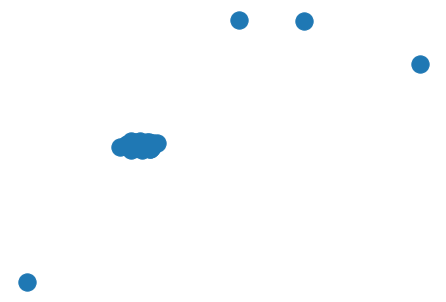

In [19]:
nx.draw(G)

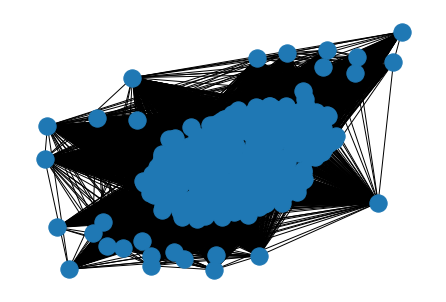

In [20]:
nx.draw(g)

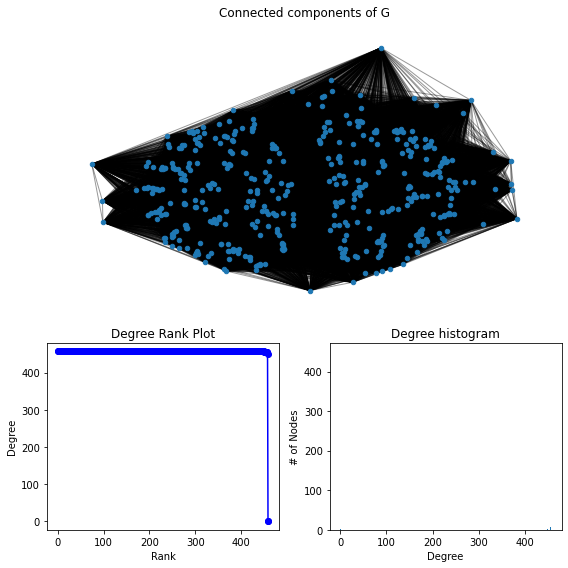

In [45]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = pickle.load(open(f'graphs/monthly/G_9_2022_10.pickle', 'rb'))

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

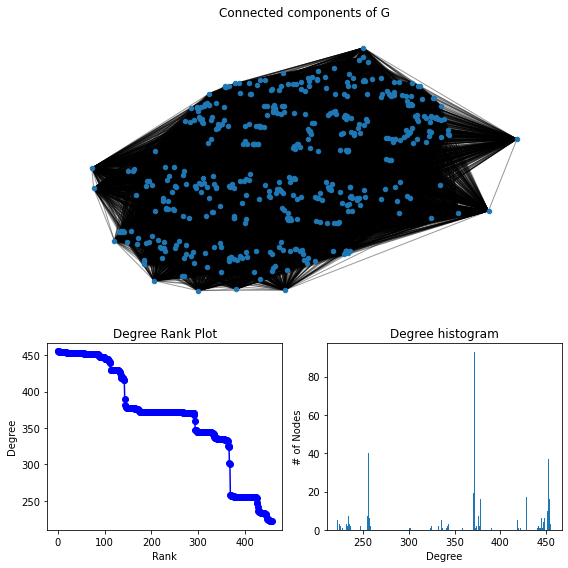

In [46]:
G = pickle.load(open(f'graphs_backbone/monthly/G_9_2022_10.pickle', 'rb'))

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [49]:
G = pickle.load(open(f'graphs/monthly/G_9_2022_10.pickle', 'rb'))
Gb = pickle.load(open(f'graphs_backbone/monthly/G_9_2022_10.pickle', 'rb'))

In [50]:
nx.number_connected_components(G)

3

In [51]:
nx.number_connected_components(Gb)

1

In [52]:
nx.density(G)

0.9912475134981529

In [53]:
nx.density(Gb)

0.7999484009058507

In [56]:
shortest_path_lengths_G = dict(nx.all_pairs_shortest_path_length(G))
shortest_path_lengths_Gb = dict(nx.all_pairs_shortest_path_length(Gb))

diameter_G = max(nx.eccentricity(G, sp=shortest_path_lengths_G).values())
diameter_Gb = max(nx.eccentricity(Gb, sp=shortest_path_lengths_Gb).values())

average_path_lengths_G = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths_G.values()]
    
average_path_lengths_Gb = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths_Gb.values()]

NetworkXError: Found infinite path length because the graph is not connected

In [57]:
shortest_path_lengths_G

{0: {0: 0,
  1: 1,
  2: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  64: 1,
  65: 1,
  66: 1,
  67: 1,
  68: 1,
  69: 1,
  70: 1,
  71: 1,
  72: 1,
  73: 1,
  74: 1,
  75: 1,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 1,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 1,
  91: 1,
  92: 1,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 1,
  101: 1,
  102: 1,
  103: 1,
  104: 1,
  105: 1,
  106: 1,
  107: 1,
  108: 1,
  109: 1,
  110: 1,
  111

Text(0, 0.5, 'Counts')

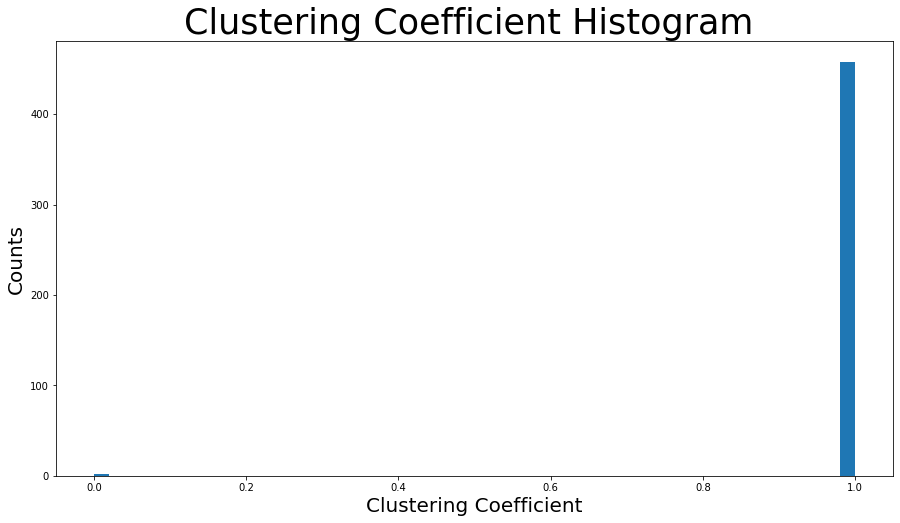

In [58]:
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

Text(0, 0.5, 'Counts')

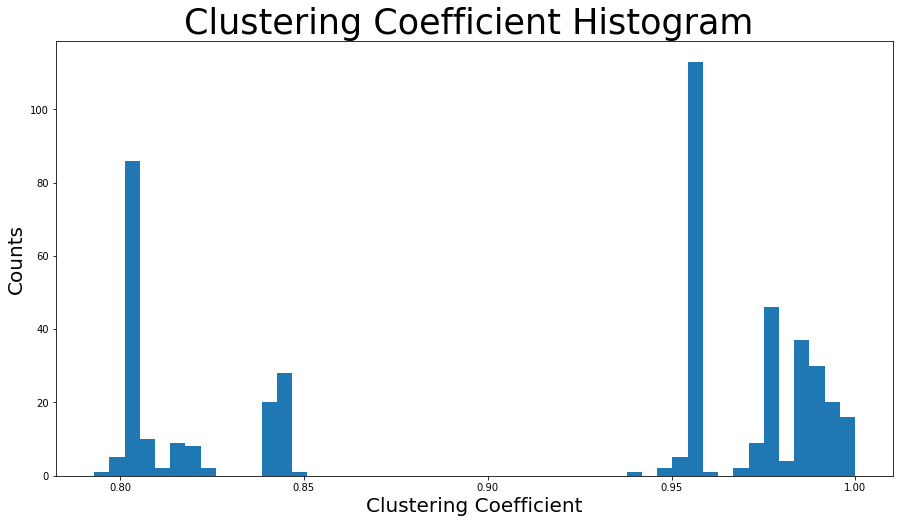

In [59]:
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(Gb).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [60]:
nx.has_bridges(G)

False

In [61]:
nx.has_bridges(Gb)

False

In [ ]:
# like Pearson correlation [-1, 1]

In [62]:
nx.attribute_assortativity_coefficient(G, "party")

-0.0022290203254237096

In [63]:
nx.attribute_assortativity_coefficient(Gb, "party")

0.1451602464114301

In [67]:
from random import randint

colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

3

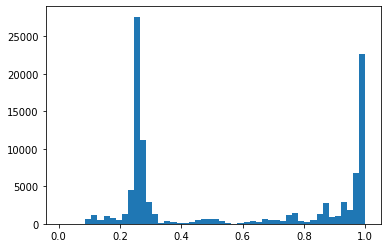

In [75]:
weights = [el[2] for el in G.edges(data='weight')]
plt.hist(weights, bins=50)
plt.show()

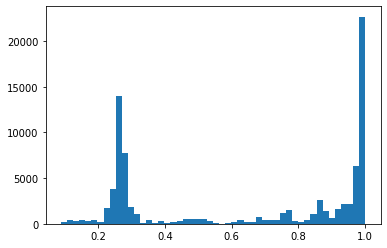

In [74]:
weights = [el[2] for el in Gb.edges(data='weight')]
plt.hist(weights, bins=50)
plt.show()

Text(0, 0.5, 'Counts')

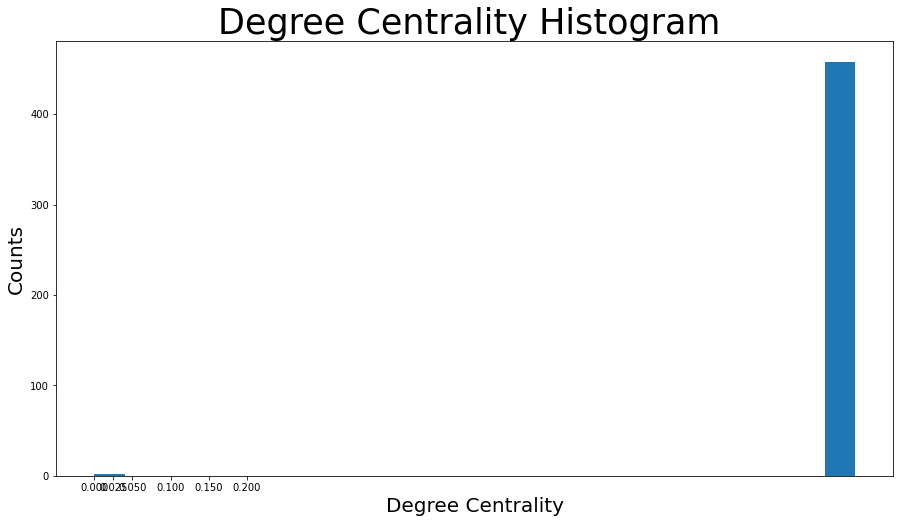

In [76]:
plt.figure(figsize=(15, 8))
plt.hist(nx.centrality.degree_centrality(G).values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

Text(0, 0.5, 'Counts')

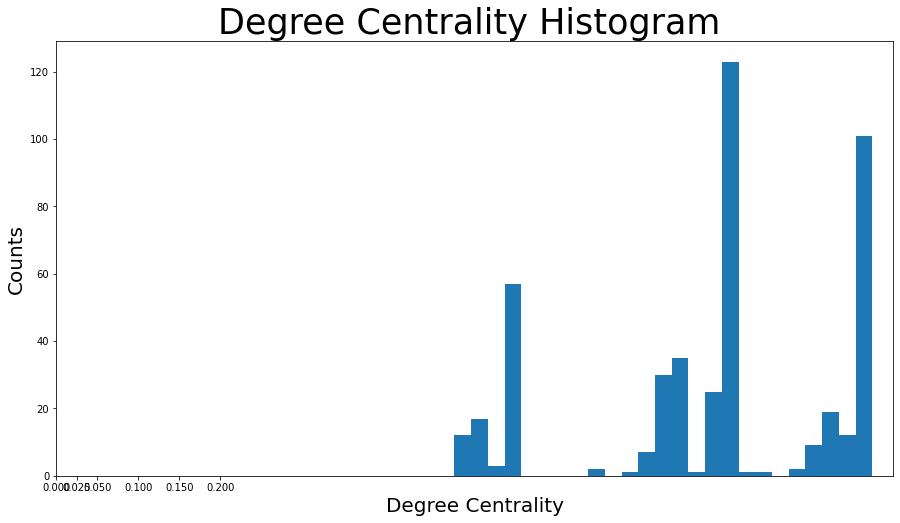

In [77]:
plt.figure(figsize=(15, 8))
plt.hist(nx.centrality.degree_centrality(Gb).values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})